In [1]:
import pandas as pd
from transformers import AutoModelForSequenceClassification, AutoTokenizer, pipeline


/Users/vaibhavkavdia/Desktop/Projects_for_Resume/Financial/Sentiment_Driven_stock_price_movement_predictor/venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
news_df=pd.read_csv("/Users/vaibhavkavdia/Desktop/Projects_for_Resume/Financial/Sentiment_Driven_stock_price_movement_predictor/data/stocks/newsapi_headlines.csv")

news_df.head()


,ticker,title,publishedAt,source
0,AAPL,isa-model-sdk added to PyPI,2025-06-20T22:57:47Z,Pypi.org
1,AAPL,INVESTOR NOTICE: Apple Inc. (AAPL) Investors w...,2025-06-20T22:15:00Z,GlobeNewswire
2,AAPL,"NVDA, TSLA, AAPL: Trump Rips ‘Too Late’ Fed Ch...",2025-06-20T19:55:44Z,Biztoc.com
3,AAPL,Time to Think Different: Tim Cook’s leadership...,2025-06-20T18:06:01Z,Macdailynews.com
4,AAPL,Investigating Apple's Standing In Technology H...,2025-06-20T15:09:04Z,Biztoc.com


In [5]:
#importing the variables
from src.Sentiment_Driven_stock_price_movement_predictor.components.data_ingestion import tickers

/Users/vaibhavkavdia/Desktop/Projects_for_Resume/Financial/Sentiment_Driven_stock_price_movement_predictor/src/Sentiment_Driven_stock_price_movement_predictor/utils.py:26: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, period=period, interval=interval, progress=False)


Saved to data/stocks/AAPL_intraday.csv


/Users/vaibhavkavdia/Desktop/Projects_for_Resume/Financial/Sentiment_Driven_stock_price_movement_predictor/src/Sentiment_Driven_stock_price_movement_predictor/utils.py:26: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, period=period, interval=interval, progress=False)


Saved to data/stocks/TSLA_intraday.csv


/Users/vaibhavkavdia/Desktop/Projects_for_Resume/Financial/Sentiment_Driven_stock_price_movement_predictor/src/Sentiment_Driven_stock_price_movement_predictor/utils.py:26: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, period=period, interval=interval, progress=False)


Saved to data/stocks/MSFT_intraday.csv


/Users/vaibhavkavdia/Desktop/Projects_for_Resume/Financial/Sentiment_Driven_stock_price_movement_predictor/src/Sentiment_Driven_stock_price_movement_predictor/utils.py:26: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, period=period, interval=interval, progress=False)


Saved to data/stocks/NVDA_intraday.csv


/Users/vaibhavkavdia/Desktop/Projects_for_Resume/Financial/Sentiment_Driven_stock_price_movement_predictor/src/Sentiment_Driven_stock_price_movement_predictor/utils.py:26: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, period=period, interval=interval, progress=False)


Saved to data/stocks/JPM_intraday.csv


In [6]:

stocks_df=pd.read_csv("/Users/vaibhavkavdia/Desktop/Projects_for_Resume/Financial/Sentiment_Driven_stock_price_movement_predictor/data/stocks/AAPL_intraday.csv")
stocks_df.head()

,Datetime,Close,High,Low,Open,Volume,Ticker
0,NaN,AAPL,AAPL,AAPL,AAPL,AAPL,NaN
1,2025-06-13 13:30:00+00:00,198.89999389648438,200.3699951171875,198.64500427246094,199.50999450683594,4848028,AAPL
2,2025-06-13 13:35:00+00:00,198.27000427246094,199.24000549316406,197.80999755859375,198.88999938964844,1210436,AAPL
3,2025-06-13 13:40:00+00:00,197.5,198.2899932861328,197.27000427246094,198.2698974609375,1258742,AAPL
4,2025-06-13 13:45:00+00:00,197.38499450683594,197.60000610351562,196.89999389648438,197.52999877929688,1163972,AAPL


In [7]:
tokenizer = AutoTokenizer.from_pretrained("ProsusAI/finbert")
model = AutoModelForSequenceClassification.from_pretrained("ProsusAI/finbert")
finbert = pipeline("sentiment-analysis", model=model, tokenizer=tokenizer)

Device set to use mps:0


In [8]:
news_df["sentiment_label"] = news_df["title"].apply(lambda x: finbert(x)[0]['label'])
news_df.head()

,ticker,title,publishedAt,source,sentiment_label
0,AAPL,isa-model-sdk added to PyPI,2025-06-20T22:57:47Z,Pypi.org,neutral
1,AAPL,INVESTOR NOTICE: Apple Inc. (AAPL) Investors w...,2025-06-20T22:15:00Z,GlobeNewswire,neutral
2,AAPL,"NVDA, TSLA, AAPL: Trump Rips ‘Too Late’ Fed Ch...",2025-06-20T19:55:44Z,Biztoc.com,negative
3,AAPL,Time to Think Different: Tim Cook’s leadership...,2025-06-20T18:06:01Z,Macdailynews.com,neutral
4,AAPL,Investigating Apple's Standing In Technology H...,2025-06-20T15:09:04Z,Biztoc.com,positive


In [9]:
label_to_score = {
    "positive": 1,
    "neutral": 0,
    "negative": -1
}

news_df["sentiment_score"] = news_df["sentiment_label"].map(label_to_score)


In [10]:
news_df["timestamp"] = pd.to_datetime(news_df["publishedAt"])
news_df["rounded_time"] = news_df["timestamp"].dt.floor("5min")


In [11]:
news_df.to_csv("data/stocks/newsapi_with_sentiment.csv", index=False)


In [ ]:
agg_sentiment = news_df.groupby(["ticker", "rounded_time"])["sentiment_score"].mean().reset_index()
agg_sentiment.rename(columns={"rounded_time": "timestamp"}, inplace=True)

# Optional: save this for next step
agg_sentiment.to_csv("data/stocks/agg_sentiment.csv", index=False)


In [13]:
import matplotlib.pyplot as plt

In [15]:
print(stocks_df.columns)
print(stocks_df.dtypes)

Index(['Datetime', 'Close', 'High', 'Low', 'Open', 'Volume', 'Ticker'], dtype='object')
Datetime    object
Close       object
High        object
Low         object
Open        object
Volume      object
Ticker      object
dtype: object


/var/folders/zl/csm4ljzx70jgj2wllb_nlz2c0000gn/T/ipykernel_25980/3005717132.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df= yf.download(ticker, period="5d", interval="5m")
[*********************100%***********************]  1 of 1 completed


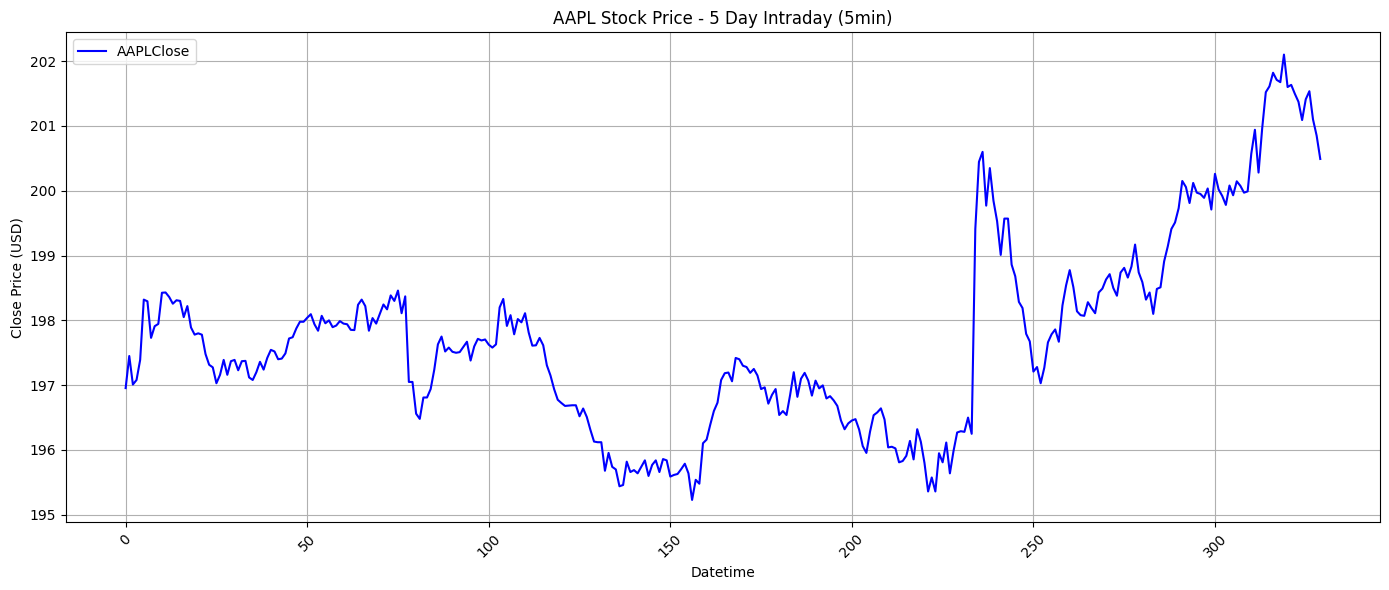

/var/folders/zl/csm4ljzx70jgj2wllb_nlz2c0000gn/T/ipykernel_25980/3005717132.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df= yf.download(ticker, period="5d", interval="5m")
[*********************100%***********************]  1 of 1 completed


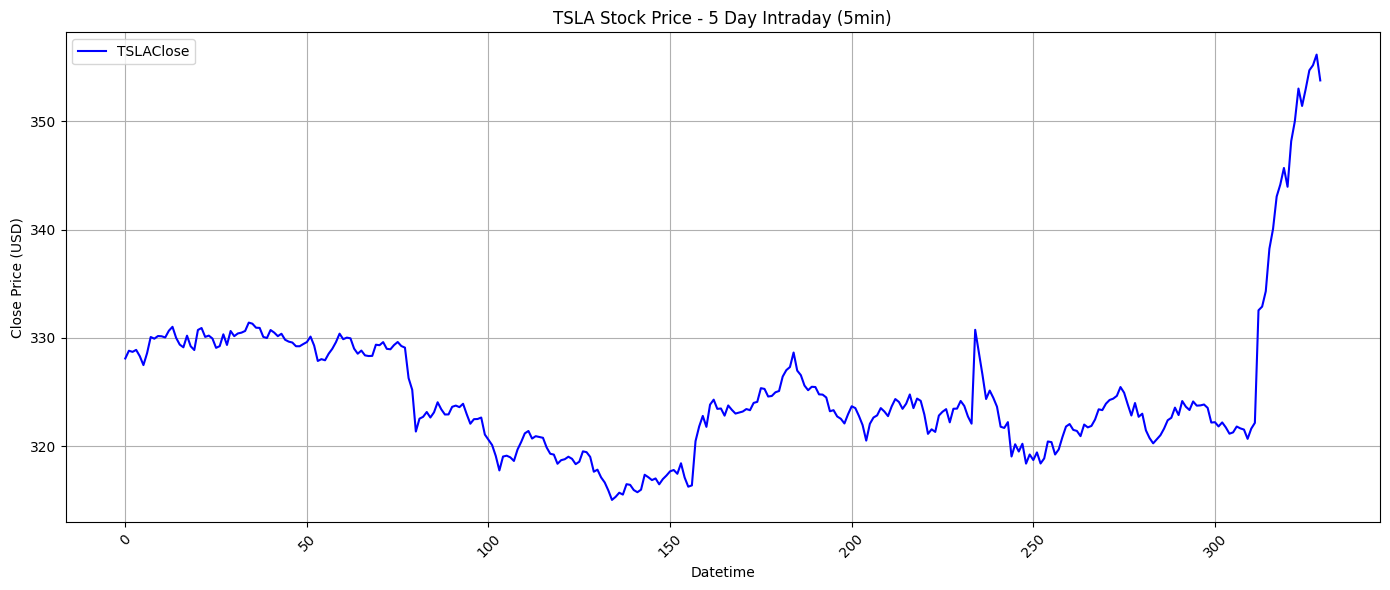

/var/folders/zl/csm4ljzx70jgj2wllb_nlz2c0000gn/T/ipykernel_25980/3005717132.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df= yf.download(ticker, period="5d", interval="5m")
[*********************100%***********************]  1 of 1 completed


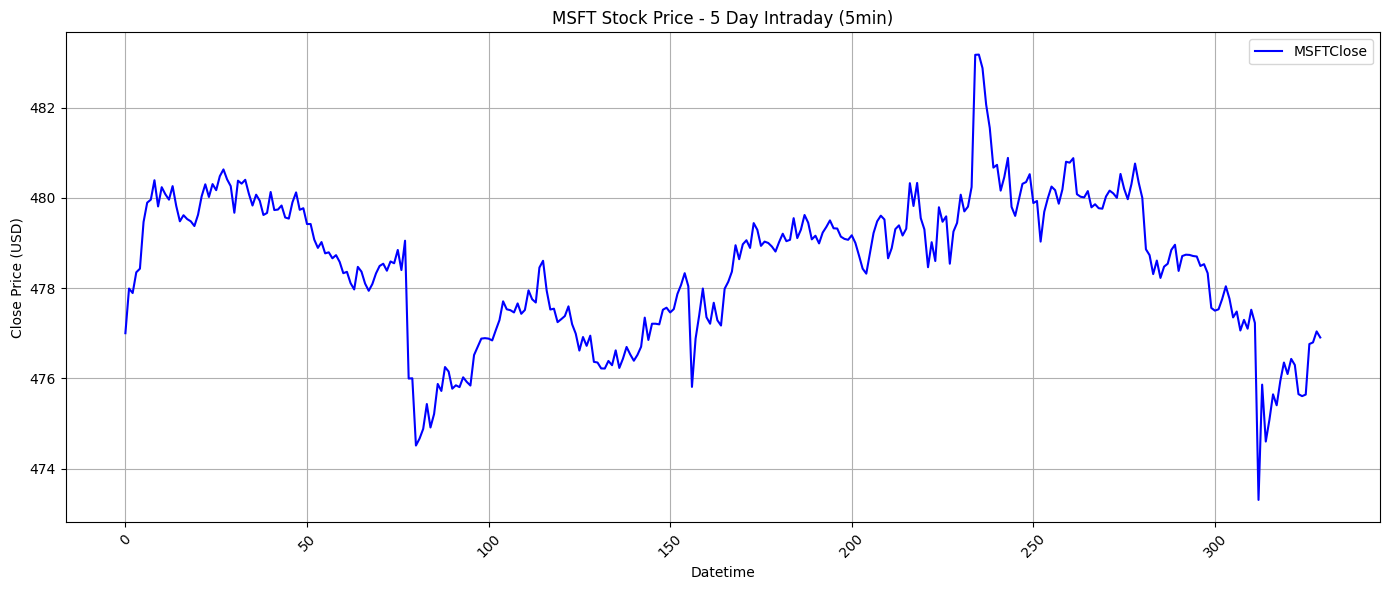

/var/folders/zl/csm4ljzx70jgj2wllb_nlz2c0000gn/T/ipykernel_25980/3005717132.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df= yf.download(ticker, period="5d", interval="5m")
[*********************100%***********************]  1 of 1 completed


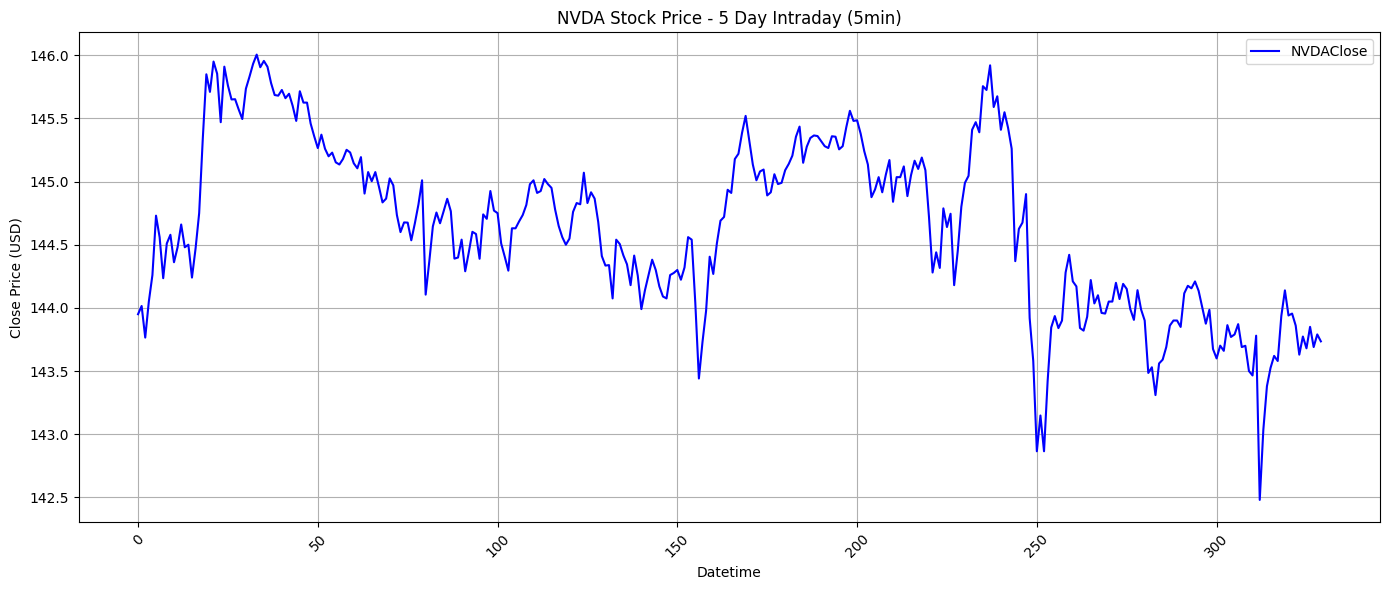

/var/folders/zl/csm4ljzx70jgj2wllb_nlz2c0000gn/T/ipykernel_25980/3005717132.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df= yf.download(ticker, period="5d", interval="5m")
[*********************100%***********************]  1 of 1 completed


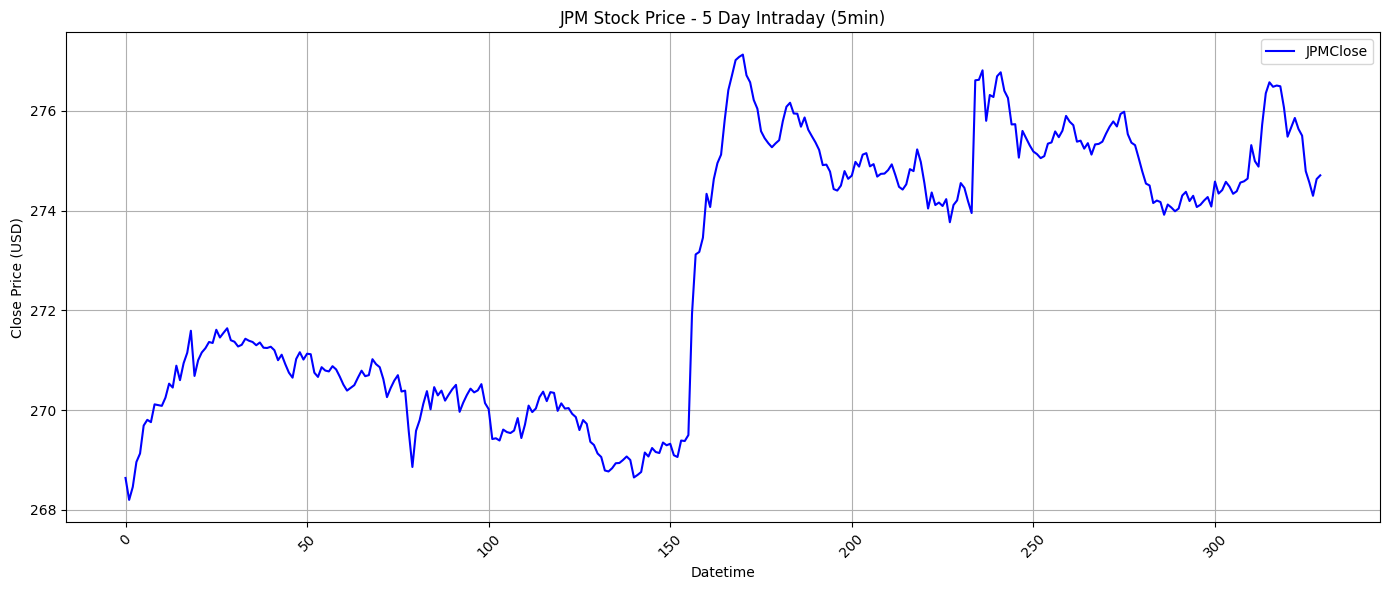

In [43]:
for ticker in tickers:
    df= yf.download(ticker, period="5d", interval="5m")

    # Reseting index to move Datetime into a column
    df = df.reset_index()

    #  Ensuring the datetime column is of datetime type
    df['Datetime'] = pd.to_datetime(df['Datetime'])

    #adjusting for the gaps between opening and closing
    df["time_index"] = range(len(df))
    # Step 5: Plot
    plt.figure(figsize=(14, 6))
    plt.plot(df['time_index'], df['Close'], label= f'{ticker}Close', color='blue')


    plt.title(f"{ticker} Stock Price - 5 Day Intraday (5min)")
    plt.xlabel("Datetime")
    plt.ylabel("Close Price (USD)")
    plt.grid(True)
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
